In [1]:
import sys
import pandas as pd
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from pathlib import Path
from geopy.geocoders import Nominatim
from shapely.geometry import Point

ROOT = Path.cwd().parent
sys.path.insert(0, str(ROOT))

from bee_tector.config import (
    BEES_CSV_PATH,
    BEES_COUNTRIES_CSV,
    COUNTRIES_PREDICT
)

In [9]:
full_df = pd.read_csv(BEES_CSV_PATH)
full_df.head()

,id,observed_on,scientific_name,common_name,photo_url,location,license
0,306444296,2025-08-15,Bombus,Bumble Bees,https://inaturalist-open-data.s3.amazonaws.com...,"63.6582816672,28.3958057128",cc-by
1,306442436,2025-08-14,Bombus bohemicus,Bohemian Cuckoo Bumble bee,https://inaturalist-open-data.s3.amazonaws.com...,"55.1668805086,25.8369277045",cc-by
2,306442093,2025-08-09,Bombus lucorum,White-tailed Bumble Bee,https://inaturalist-open-data.s3.amazonaws.com...,"55.8554033333,-4.0173916667",cc0
3,306441992,2025-07-29,Bombus pascuorum,Common Carder Bumble Bee,https://inaturalist-open-data.s3.amazonaws.com...,"56.480225,-5.9940616667",cc0
4,306439346,2025-08-14,Bombus,Bumble Bees,https://inaturalist-open-data.s3.amazonaws.com...,"55.9393141806,-3.1699150801",cc0


In [10]:
name_loc_df = full_df.drop(columns=["id", "photo_url", "license"])
name_loc_df.head()

,observed_on,scientific_name,common_name,location
0,2025-08-15,Bombus,Bumble Bees,"63.6582816672,28.3958057128"
1,2025-08-14,Bombus bohemicus,Bohemian Cuckoo Bumble bee,"55.1668805086,25.8369277045"
2,2025-08-09,Bombus lucorum,White-tailed Bumble Bee,"55.8554033333,-4.0173916667"
3,2025-07-29,Bombus pascuorum,Common Carder Bumble Bee,"56.480225,-5.9940616667"
4,2025-08-14,Bombus,Bumble Bees,"55.9393141806,-3.1699150801"


In [11]:
name_loc_df['class_name'] = name_loc_df['common_name'].str.replace(" ", "_")
name_loc_df.head()

,observed_on,scientific_name,common_name,location,class_name
0,2025-08-15,Bombus,Bumble Bees,"63.6582816672,28.3958057128",Bumble_Bees
1,2025-08-14,Bombus bohemicus,Bohemian Cuckoo Bumble bee,"55.1668805086,25.8369277045",Bohemian_Cuckoo_Bumble_bee
2,2025-08-09,Bombus lucorum,White-tailed Bumble Bee,"55.8554033333,-4.0173916667",White-tailed_Bumble_Bee
3,2025-07-29,Bombus pascuorum,Common Carder Bumble Bee,"56.480225,-5.9940616667",Common_Carder_Bumble_Bee
4,2025-08-14,Bombus,Bumble Bees,"55.9393141806,-3.1699150801",Bumble_Bees


In [12]:
name_loc_df[["lat","lon"]] = name_loc_df["location"].str.split(",", n=1, expand=True).astype(float)
name_loc_df.head()

,observed_on,scientific_name,common_name,location,class_name,lat,lon
0,2025-08-15,Bombus,Bumble Bees,"63.6582816672,28.3958057128",Bumble_Bees,63.658282,28.395806
1,2025-08-14,Bombus bohemicus,Bohemian Cuckoo Bumble bee,"55.1668805086,25.8369277045",Bohemian_Cuckoo_Bumble_bee,55.166881,25.836928
2,2025-08-09,Bombus lucorum,White-tailed Bumble Bee,"55.8554033333,-4.0173916667",White-tailed_Bumble_Bee,55.855403,-4.017392
3,2025-07-29,Bombus pascuorum,Common Carder Bumble Bee,"56.480225,-5.9940616667",Common_Carder_Bumble_Bee,56.480225,-5.994062
4,2025-08-14,Bombus,Bumble Bees,"55.9393141806,-3.1699150801",Bumble_Bees,55.939314,-3.169915


In [13]:
name_loc_df["country"] = pd.NA
name_loc_df["country_code"] = pd.NA
name_loc_df.head()

,observed_on,scientific_name,common_name,location,class_name,lat,lon,country,country_code
0,2025-08-15,Bombus,Bumble Bees,"63.6582816672,28.3958057128",Bumble_Bees,63.658282,28.395806,<NA>,<NA>
1,2025-08-14,Bombus bohemicus,Bohemian Cuckoo Bumble bee,"55.1668805086,25.8369277045",Bohemian_Cuckoo_Bumble_bee,55.166881,25.836928,<NA>,<NA>
2,2025-08-09,Bombus lucorum,White-tailed Bumble Bee,"55.8554033333,-4.0173916667",White-tailed_Bumble_Bee,55.855403,-4.017392,<NA>,<NA>
3,2025-07-29,Bombus pascuorum,Common Carder Bumble Bee,"56.480225,-5.9940616667",Common_Carder_Bumble_Bee,56.480225,-5.994062,<NA>,<NA>
4,2025-08-14,Bombus,Bumble Bees,"55.9393141806,-3.1699150801",Bumble_Bees,55.939314,-3.169915,<NA>,<NA>


In [ ]:
name_loc_df.isnull().sum()

,0
observed_on,3
scientific_name,0
common_name,246
location,14
class_name,246
lat,14
lon,14
country,9783
country_code,9783


In [ ]:
geo = Nominatim(user_agent="bee-tector")

In [ ]:
import time, numpy as np
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

# ensure defaults exist
name_loc_df["country"] = name_loc_df.get("country", "Unknown")
name_loc_df["country_code"] = name_loc_df.get("country_code", "UNK")

geo = Nominatim(user_agent="bee-tector/1.0 (you@example.com)", timeout=5)

def reverse_with_retry(lat, lon, retries=3, wait=2):
    for k in range(retries):
        try:
            return geo.reverse((lat, lon), language="en", exactly_one=True)
        except (GeocoderTimedOut, GeocoderServiceError):
            time.sleep(wait * (k + 1))
    return None

def valid(lat, lon):
    return np.isfinite(lat) and np.isfinite(lon) and -90 <= lat <= 90 and -180 <= lon <= 180

total = len(name_loc_df)
for n, (i, row) in enumerate(name_loc_df.iterrows(), start=1):
    if valid(row["lat"], row["lon"]):
        loc = reverse_with_retry(row["lat"], row["lon"])
        if loc and "address" in loc.raw:
            addr = loc.raw["address"]
            name_loc_df.loc[i, "country"] = addr.get("country", "Unknown")
            name_loc_df.loc[i, "country_code"] = (addr.get("country_code") or "").upper() or "UNK"
    else:
        name_loc_df.loc[i, "country"] = "Unknown"
        name_loc_df.loc[i, "country_code"] = "UNK"

    if n % 5 == 0:
        print(f"[{n}/{total}] ({row['lat']:.4f}, {row['lon']:.4f}) -> {name_loc_df.loc[i,'country']}", flush=True)

    time.sleep(1)


[5/9991] (55.9393, -3.1699) -> United Kingdom
[10/9991] (46.9289, -121.5957) -> United States
[15/9991] (44.9665, -93.1570) -> United States
[20/9991] (36.7738, -118.3804) -> United States
[25/9991] (39.4358, -120.2078) -> United States
[30/9991] (45.1668, -72.3032) -> Canada
[35/9991] (45.5706, 25.5579) -> Romania
[40/9991] (44.5668, -123.2699) -> United States
[45/9991] (35.2079, -80.8476) -> United States
[50/9991] (39.4078, -123.8137) -> United States
[55/9991] (44.9679, -93.1580) -> United States
[60/9991] (44.9640, -93.1573) -> United States
[65/9991] (43.8374, -69.5081) -> United States
[70/9991] (32.7326, -117.1471) -> United States
[75/9991] (38.8926, -77.0796) -> United States
[80/9991] (43.1707, -80.2682) -> Canada
[85/9991] (48.7585, -64.1795) -> Canada
[90/9991] (38.7873, -77.3174) -> United States
[95/9991] (45.7974, -90.0008) -> United States
[100/9991] (33.8138, -84.2834) -> United States
[105/9991] (33.8138, -84.2834) -> United States
[110/9991] (51.5775, 0.5497) -> Un

[155/9991] (44.3080, -71.2173) -> United States
[160/9991] (45.8993, -64.3739) -> Canada
[165/9991] (36.6928, -118.3724) -> United States
[170/9991] (53.2421, -2.1377) -> United Kingdom
[175/9991] (49.5063, -123.6086) -> Canada
[180/9991] (48.5191, -122.9211) -> United States
[185/9991] (53.2319, -2.1400) -> United Kingdom
[190/9991] (44.3079, -71.2172) -> United States
[195/9991] (53.2312, -2.8888) -> United Kingdom
[200/9991] (49.2707, -123.1978) -> Canada
[205/9991] (44.5246, -110.8410) -> United States
[210/9991] (44.5624, -110.3116) -> United States
[215/9991] (56.1611, 10.1602) -> Denmark
[220/9991] (51.4975, -0.0595) -> United Kingdom
[225/9991] (51.4289, -0.2635) -> United Kingdom
[230/9991] (50.6444, -2.4200) -> United Kingdom
[235/9991] (55.3054, 58.1207) -> Russia
[240/9991] (50.1837, 13.9176) -> Czechia
[245/9991] (36.6681, -118.4000) -> United States
[250/9991] (41.2272, -95.8234) -> United States
[255/9991] (43.0378, -87.9306) -> United States
[260/9991] (37.9484, -122.75

[3895/9991] (55.9385, -3.2517) -> United Kingdom


[3900/9991] (36.0001, -95.9371) -> United States
[3905/9991] (56.5736, -2.5779) -> United Kingdom
[3910/9991] (54.9275, -3.2100) -> United Kingdom
[3915/9991] (49.4128, 8.7046) -> Germany
[3920/9991] (43.6151, 3.8716) -> France
[3925/9991] (46.4967, 9.8554) -> Switzerland
[3930/9991] (46.4968, 9.8553) -> Switzerland
[3935/9991] (44.4540, -72.9858) -> United States
[3940/9991] (46.4968, 9.8554) -> Switzerland
[3945/9991] (61.1179, 10.8522) -> Norway
[3950/9991] (53.6465, -2.0978) -> United Kingdom
[3955/9991] (45.7432, -78.0075) -> Canada
[3960/9991] (51.5173, -3.7332) -> United Kingdom
[3965/9991] (53.3642, -2.9344) -> United Kingdom
[3970/9991] (42.4028, 2.1635) -> Spain
[3975/9991] (42.4010, 2.1614) -> Spain
[3980/9991] (57.6243, 11.8998) -> Sweden
[3985/9991] (45.0212, -93.1474) -> United States
[3990/9991] (51.5110, -0.1753) -> United Kingdom
[3995/9991] (49.6348, -114.6368) -> Canada
[4000/9991] (42.4205, 2.2614) -> Spain
[4005/9991] (53.8906, 87.4375) -> Russia
[4010/9991] (49.27

[4340/9991] (45.6359, 6.1174) -> France
[4345/9991] (45.5775, 5.7372) -> France
[4350/9991] (56.3109, -120.9871) -> Canada
[4355/9991] (44.8312, 24.8452) -> Romania
[4360/9991] (48.8503, -121.6876) -> United States
[4365/9991] (47.9519, -122.2935) -> United States
[4370/9991] (37.9140, -119.2698) -> United States
[4375/9991] (46.4071, 9.6938) -> Switzerland
[4380/9991] (51.1670, -118.1464) -> Canada
[4385/9991] (41.2307, -95.8122) -> United States
[4390/9991] (51.1662, -118.1341) -> Canada
[4395/9991] (39.7461, -105.0366) -> United States
[4400/9991] (55.1685, 25.8412) -> Lithuania
[4405/9991] (52.1210, -106.7052) -> Canada
[4410/9991] (44.4207, -70.8146) -> United States
[4415/9991] (41.9674, -87.6967) -> United States
[4420/9991] (51.3046, 0.1666) -> United Kingdom
[4425/9991] (50.6542, -99.9686) -> Canada
[4430/9991] (nan, nan) -> Unknown
[4435/9991] (42.4657, -76.5347) -> United States
[4440/9991] (51.1373, 1.3193) -> United Kingdom
[4445/9991] (40.5307, -79.8597) -> United States


[5485/9991] (57.8174, -152.3523) -> United States
[5490/9991] (51.4247, -2.1785) -> United Kingdom
[5495/9991] (42.8086, -78.8160) -> United States
[5500/9991] (42.8090, -78.8129) -> United States
[5505/9991] (50.3508, -119.0595) -> Canada
[5510/9991] (42.8098, -78.8141) -> United States
[5515/9991] (44.9995, -93.1328) -> United States
[5520/9991] (47.5904, -120.6643) -> United States
[5525/9991] (38.9751, -77.4011) -> United States
[5530/9991] (47.3480, -121.4386) -> United States
[5535/9991] (53.4971, -112.0513) -> Canada
[5540/9991] (35.5826, -83.0710) -> United States
[5545/9991] (37.9474, -122.5033) -> United States
[5550/9991] (54.2855, -0.5664) -> United Kingdom
[5555/9991] (49.3645, -100.4918) -> Canada
[5560/9991] (49.0142, -118.4391) -> Canada
[5565/9991] (39.6995, -104.9654) -> United States
[5570/9991] (53.8788, -0.6112) -> United Kingdom
[5575/9991] (53.8788, -0.6113) -> United Kingdom
[5580/9991] (53.8789, -0.6111) -> United Kingdom
[5585/9991] (43.4953, -72.2831) -> Unit

In [ ]:
# name_loc_df.to_csv("/content/drive/MyDrive/BeeTector/bees_with_countries.csv", index=False)

# Countries Exploration

In [18]:
df = pd.read_csv(BEES_COUNTRIES_CSV)
df.head()

,observed_on,scientific_name,common_name,location,class_name,lat,lon,country,country_code
0,2025-08-15,Bombus,Bumble Bees,"63.6582816672,28.3958057128",Bumble_Bees,63.658282,28.395806,Finland,FI
1,2025-08-14,Bombus bohemicus,Bohemian Cuckoo Bumble bee,"55.1668805086,25.8369277045",Bohemian_Cuckoo_Bumble_bee,55.166881,25.836928,Lithuania,LT
2,2025-08-09,Bombus lucorum,White-tailed Bumble Bee,"55.8554033333,-4.0173916667",White-tailed_Bumble_Bee,55.855403,-4.017392,United Kingdom,GB
3,2025-07-29,Bombus pascuorum,Common Carder Bumble Bee,"56.480225,-5.9940616667",Common_Carder_Bumble_Bee,56.480225,-5.994062,United Kingdom,GB
4,2025-08-14,Bombus,Bumble Bees,"55.9393141806,-3.1699150801",Bumble_Bees,55.939314,-3.169915,United Kingdom,GB


In [19]:
df.isnull().sum()

observed_on          3
scientific_name      0
common_name        246
location            14
class_name         246
lat                 14
lon                 14
country              0
country_code         0
dtype: int64

In [20]:
bees_df = df.copy()

In [23]:
bees_df['country_code'].count()

9991

In [77]:
bees_df["country"] = bees_df["country"].fillna("Unknown")
bees_df = bees_df[bees_df["country"] != "Unknown"]
freq = (df.groupby(["common_name","country"])
          .size().reset_index(name="n"))
countries_by_bee = (freq.sort_values(["common_name","n"], ascending=[True,False])
                      .groupby("common_name")["country"]
                      .apply(list))
for bee, countries in countries_by_bee.items():
    print(f"{bee}: {', '.join(countries)}")

American Bumble Bee: United States, Canada
Brown-belted Bumble Bee: United States, Canada
Buff-tailed Bumble Bee: United Kingdom, Germany, Russia, Italy, New Zealand, Denmark, Czechia, France, Netherlands, Luxembourg, Portugal, Spain, Ukraine, Kazakhstan, Finland, Poland, Sweden, Belgium, Croatia, Cyprus, Norway, Romania, Austria, Georgia, Hungary, Lithuania, Serbia, Switzerland, Turkey
Common Carder Bumble Bee: United Kingdom, Germany, Russia, France, Austria, Czechia, Finland, Italy, Norway, Poland, Denmark, Belgium, Ireland, Lithuania, Netherlands, Spain, Sweden, Romania, Switzerland, Luxembourg, Ukraine, Bosnia and Herzegovina, Croatia, Estonia, Kazakhstan, Portugal, Turkey
Common Eastern Bumble Bee: United States, Canada
Half-black Bumble Bee: United States, Canada
Red-belted Bumble Bee: Canada, United States
Red-tailed Bumble Bee: United Kingdom, Germany, Russia, Finland, Austria, France, Italy, Poland, Czechia, Netherlands, Norway, Denmark, Sweden, Luxembourg, Belgium, Switzerla

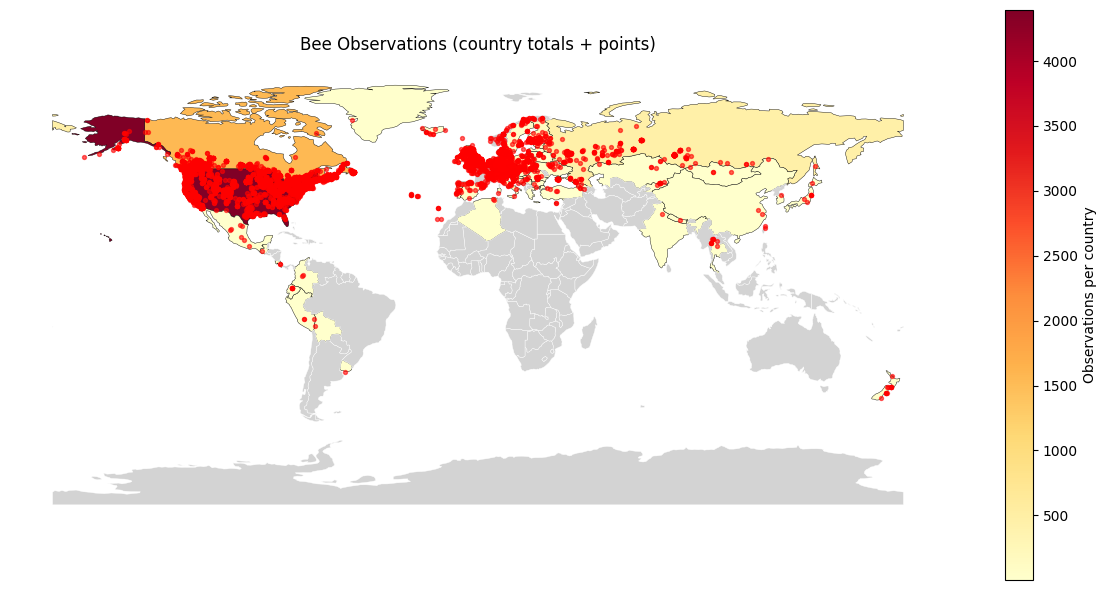

In [54]:
df = pd.read_csv(BEES_COUNTRIES_CSV)

world = gpd.read_file(
    "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
)

counts = (
    df.groupby("country_code")
      .size()
      .rename("n_obs")
      .reset_index()
      .rename(columns={"country_code": "ISO_A2"})
)

world_counts = world.merge(counts, on="ISO_A2", how="left")

gdf_points = gpd.GeoDataFrame(
    df,
    geometry=[Point(xy) for xy in zip(df["lon"], df["lat"])],
    crs="EPSG:4326",
)

fig, ax = plt.subplots(figsize=(12, 6))
world_counts.plot(
    column="n_obs",
    cmap="YlOrRd",          # or "YlOrRd", "plasma", etc.
    legend=True,
    legend_kwds={"label": "Observations per country"},
    linewidth=0.3,
    edgecolor="black",
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "label": "No data",
    },
    ax=ax,
)
gdf_points.plot(
    ax=ax,
    markersize=8,
    color="red",
    alpha=0.6,
)
ax.set_title("Bee Observations (country totals + points)", pad=10)
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [61]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

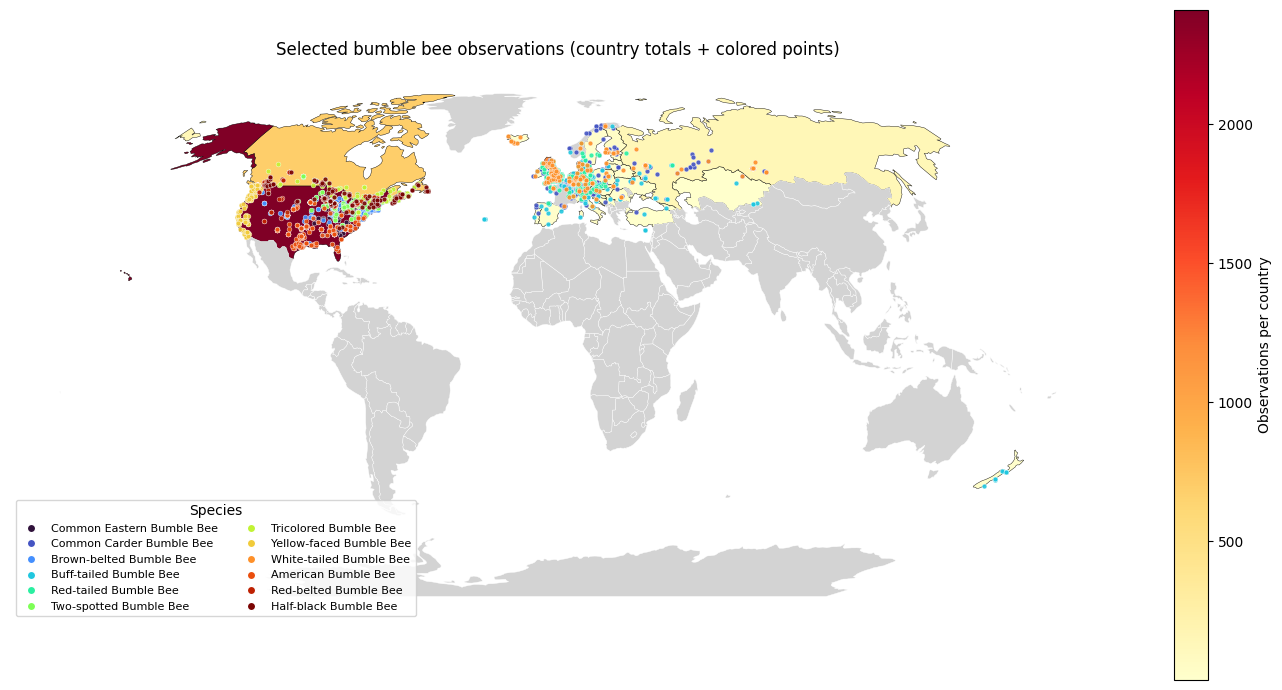

In [75]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

keep = [
    "Common Eastern Bumble Bee","Common Carder Bumble Bee","Brown-belted Bumble Bee",
    "Buff-tailed Bumble Bee","Red-tailed Bumble Bee","Two-spotted Bumble Bee",
    "Tricolored Bumble Bee","Yellow-faced Bumble Bee","White-tailed Bumble Bee",
    "American Bumble Bee","Red-belted Bumble Bee","Half-black Bumble Bee",
]

# --- data ---
df = pd.read_csv(BEES_COUNTRIES_CSV)
df = df[df["common_name"].isin(keep)].dropna(subset=["lat","lon"]).copy()
df["country_code"] = df["country_code"].str.upper()

world = gpd.read_file(
    "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
)

counts = (df.groupby("country_code").size()
          .rename("n_obs").reset_index()
          .rename(columns={"country_code": "ISO_A2"}))

world_counts = world.merge(counts, on="ISO_A2", how="left")

gdf_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df["lon"], df["lat"]), crs="EPSG:4326"
)

# --- Robinson projection ---
rob = "+proj=robin"
world_p = world_counts.to_crs(rob)
pts_p   = gdf_points.to_crs(rob)

# --- plot ---
fig, ax = plt.subplots(figsize=(14, 7))

world_p.plot(
    column="n_obs",
    cmap="YlOrRd",
    legend=True,
    legend_kwds={"label": "Observations per country"},
    linewidth=0.3,
    edgecolor="black",
    missing_kwds={"color": "lightgrey", "edgecolor": "white", "label": "No data"},
    ax=ax,
)

species = keep
cmap = plt.get_cmap("turbo", len(species))
legend_handles = []
for k, sp in enumerate(species):
    sub = pts_p[pts_p["common_name"] == sp]
    if sub.empty:
        continue
    color = cmap(k)
    sub.plot(ax=ax, color=color, markersize=12, alpha=0.9,
             edgecolor="white", linewidth=0.3)
    legend_handles.append(
        Line2D([0], [0], marker="o", color="w",
               label=sp, markerfacecolor=color, markersize=6)
    )

ax.legend(handles=legend_handles, title="Species",
          loc="lower left", ncol=2, fontsize=8)
ax.set_title("Selected bumble bee observations (country totals + colored points)", pad=10)
ax.set_axis_off()
plt.tight_layout()
plt.show()


# New CSV for Predictions

In [3]:
df = pd.read_csv(BEES_COUNTRIES_CSV)

df = df[df["class_name"] != "Bumble_Bees"]

df["country"] = df["country"].fillna("Unknown")
df["country_code"] = df["country_code"].fillna("")

# keep only what we care about
slim = df[[
    "class_name",
    "common_name",
    "scientific_name",
    "country",
    "country_code"
]].drop_duplicates()

slim = slim.sort_values("common_name").reset_index(drop=True)
slim.head()


,class_name,common_name,scientific_name,country,country_code
0,Alpine_Bumble_Bee,Alpine Bumble Bee,Bombus alpinus,Sweden,SE
1,Amazonian_Bumble_Bee,Amazonian Bumble Bee,Bombus transversalis,Peru,PE
2,American_Bumble_Bee,American Bumble Bee,Bombus pensylvanicus,United States,US
3,American_Bumble_Bee,American Bumble Bee,Bombus pensylvanicus,Unknown,UNK
4,American_Bumble_Bee,American Bumble Bee,Bombus pensylvanicus,Canada,CA


In [4]:
slim.to_csv("bees_with_countries.csv", index=False)
print(f"Saved {len(slim)} rows")

Saved 466 rows
